<a href="https://colab.research.google.com/github/iamapickle/pneumonia_xray/blob/master/xray_pneunmonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install kaggle

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "siddhants150"
os.environ['KAGGLE_KEY'] = "9971f6fc5bc071ab44090a6a93c3d107"

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:22<00:00, 58.8MB/s]
100% 2.29G/2.29G [00:22<00:00, 109MB/s] 


In [8]:
os.chdir("/content/")
os.listdir()
# !dir

['.config', 'chest-xray-pneumonia.zip', 'sample_data']

In [2]:
import zipfile

In [12]:
# os.chdir("/content/")
# for file in os.listdir():
#   if file!='.config' and file!='.ipynb_checkpoints' and file!='sample_data':
#     zip_ref = zipfile.ZipFile(file, 'r')
#     zip_ref.extractall()
#     zip_ref.close()

In [3]:
import cv2
import numpy as np
import pandas as pd

In [13]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [14]:
train_data = get_data("/content/chest_xray/train")
test_data = get_data("/content/chest_xray/test")
val_data = get_data("/content/chest_xray/val")

In [15]:
import matplotlib.pyplot as plt

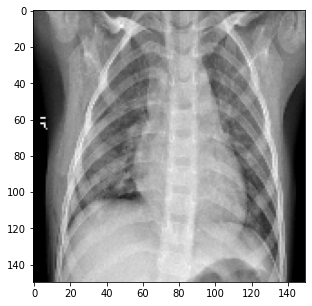

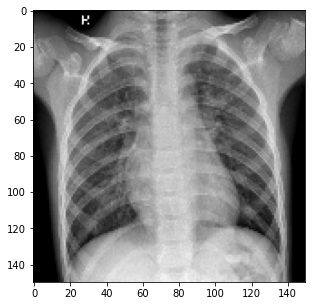

In [16]:
plt.figure(figsize = (5,5))
plt.imshow(train_data[0][0], cmap='gray')

plt.figure(figsize = (5,5))
plt.imshow(train_data[4000][0], cmap='gray')

In [17]:
pneumonia_patients=0
for i in range(0, train_data.shape[0]):
    if (train_data[i][1]==0):
        pneumonia_patients+=1

for i in range(0, test_data.shape[0]):
    if (test_data[i][1]==0):
        pneumonia_patients+=1

healthy_lungs=train_data.shape[0]+test_data.shape[0]-pneumonia_patients

In [49]:
x_train_data=[]
y_train_data=[]
x_test_data=[]
y_test_data=[]
for i in range(0, train_data.shape[0]):
    x_train_data.append(train_data[i][0])
    y_train_data.append(train_data[i][1])

for i in range(0, test_data.shape[0]):
    x_test_data.append(test_data[i][0])
    y_test_data.append(test_data[i][1])

In [50]:
x_test_data=np.array(x_test_data)/255
x_train_data=np.array(x_train_data)/255

In [51]:
x_test_data.shape

(624, 150, 150)

In [52]:
x_train_data = x_train_data.reshape(list(x_train_data.shape) + [1]) 
x_test_data = x_test_data.reshape(list(x_test_data.shape)+[1])

In [53]:
y_test_data=np.array(y_test_data)
y_train_data=np.array(y_train_data)

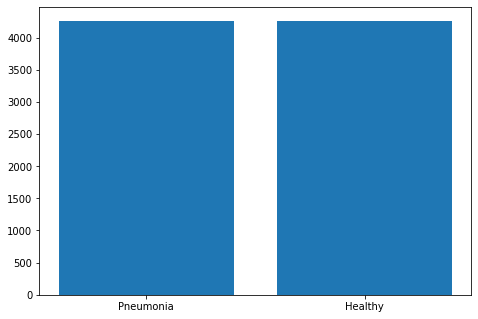

In [22]:
label = ["Pneumonia", "Healthy"]
patients = [pneumonia_patients]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label, patients)
plt.show()

In [24]:
!pip install keras

In [25]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 70kB/s 
     |████████████████████████████████| 204kB 48.0MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=7a32e2fee0d4bf8a84ccaccc5991c02672fe34535d5f9372e93bfe6ccb30ef1f
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [26]:
!pip install elephas

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, BatchNormalization, Dropout

In [28]:
from elephas.spark_model import SparkModel
from elephas.utils.rdd_utils import to_simple_rdd

from pyspark import SparkContext, SparkConf

WARNING


In [29]:
from keras.optimizers import SGD

In [64]:
model = Sequential()

In [65]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=x_train_data.shape[1:], padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), activation='softmax'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# sc.stop()
# sc = SparkContext() 
# rdd = to_simple_rdd(sc, x_train, y_train)

In [ ]:
# y_train_data=np.array(y_train_data)
# sgd = SGD(lr=0.1)
# model.compile(sgd, 'categorical_crossentropy', ['acc'])
# sparkModel = SparkModel(model, frequency='epoch', mode='asynchronous')
# sparkModel.fit(rdd, epochs=20, batch_size=128, verbose=0, validation_split=0.1)
# model.summary()

In [66]:
# y_train_data=np.array(y_train_data)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(x_train_data, y_train_data, batch_size=128, epochs=20)

Epoch 1/20
41/41 [==============================] - 168s 4s/step - loss: 0.5857 - accuracy: 0.7306
Epoch 2/20
41/41 [==============================] - 169s 4s/step - loss: 0.5010 - accuracy: 0.7676
Epoch 3/20
41/41 [==============================] - 174s 4s/step - loss: 0.2559 - accuracy: 0.9045
Epoch 4/20
41/41 [==============================] - 169s 4s/step - loss: 0.1817 - accuracy: 0.9291
Epoch 5/20
41/41 [==============================] - 169s 4s/step - loss: 0.1567 - accuracy: 0.9392
Epoch 6/20
41/41 [==============================] - 170s 4s/step - loss: 0.1468 - accuracy: 0.9433
Epoch 7/20
41/41 [==============================] - 170s 4s/step - loss: 0.1550 - accuracy: 0.9388
Epoch 8/20
41/41 [==============================] - 170s 4s/step - loss: 0.1357 - accuracy: 0.9446
Epoch 9/20
41/41 [==============================] - 170s 4s/step - loss: 0.1330 - accuracy: 0.9469
Epoch 10/20
41/41 [==============================] - 171s 4s/step - loss: 0.1281 - accuracy: 0.9496
Epoch 11/

In [67]:
score, acc = model.evaluate(x_test_data, y_test_data, verbose=0)
print(acc)

0.7676281929016113


In [71]:
from sklearn import svm, metrics
from sklearn.svm import LinearSVC

In [35]:
svmx_test_data=[]
svmy_test_data=[]
svmx_train_data=[]
svmy_train_data=[]
for i in range(0, train_data.shape[0]):
  svmx_train_data.append(train_data[i][0])
  svmy_train_data.append(train_data[i][1])
for i in range(0, test_data.shape[0]):
    svmx_test_data.append(test_data[i][0])
    svmy_test_data.append(test_data[i][1])

In [36]:
len(svmx_test_data)

624

In [37]:
svmx_test_data = np.array(svmx_test_data)
svmx_test_data = svmx_test_data.reshape((len(svmx_test_data), -1))
svmx_train_data = np.array(svmx_train_data)
svmx_train_data = svmx_train_data.reshape((len(svmx_train_data), -1))
# svmx_test_data.shape

In [76]:
linearsvc = LinearSVC(penalty='l2', loss='squared_hinge')
linearsvc.fit(svmx_train_data, svmy_train_data)
pre_linear_svc = linearsvc.predict(svmx_test_data)
f1_linear_svc = f1_score(svmy_test_data, pre_linear_svc, average='weighted')
print(f1_score_test)

0.4807692307692308


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
svm_classifier = svm.SVC(gamma=0.002)
svm_classifier.fit(svmx_train_data, svmy_train_data)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
svmx_test_data.shape

(624, 22500)

In [40]:
from sklearn.metrics import f1_score
pred_y_test = svm_classifier.predict(svmx_test_data)
f1_score_test = f1_score(svmy_test_data, pred_y_test, average='weighted')
print(f1_score_test)

0.4807692307692308
